In [68]:
from diags import Conventional
import numpy as np
import pandas as pd
from filter_df import filter_df
from da_plots import base_plots, wind_base_plots
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Exploring time series plots

In [43]:
# Get the yesterdays date
today = datetime.today()
yesteryesterday = today - timedelta(days=2)

# Format date
date_str = yesteryesterday.strftime('%Y%m%d')
print(date_str)

20240626


In [44]:
rrfs_data_fp = "/lfs4/BMC/nrtrr/NCO_dirs/v0.8.8/com/prod/"
rtma_data_fp = "/lfs4/BMC/nrtrr/NCO_dirs/rtma.v0.8.8/com/prod/RTMA_CONUS." + date_str

In [45]:
# Get a list of strings with all hours of day
hours = [f"{i:02d}" for i in range(24)]
var = 't'

## Dataframe for reference

In [46]:
test_hr = '22'

In [47]:
test_fp = f"{rtma_data_fp}/{test_hr}/diag_conv_t_anl.{date_str}{test_hr}.nc4.gz"

In [48]:
test_df = Conventional(test_fp).get_data()

In [58]:
test_df

,station_id,observation_class,observation_type,observation_subtype,latitude,longitude,station_elevation,pressure,height,time,...,errinv_final,observation,omf_adjusted,omf_unadjusted,data_pof,data_vertical_velocity,dominant_sfc_type,model_terrain,hofx_unadjusted,hofx_adjusted
0,4YXRFVQ,t,194,0,31.600000,233.000000,48.0,1012.299988,48.0,0.00000,...,1.000000e-09,290.049988,0.814327,1.220281,-9.990000e+09,-9.990000e+09,0.0,0.000000,288.829712,289.235657
1,G4CUISJA,t,133,0,32.560001,233.210007,10363.0,250.000000,10363.0,0.02222,...,1.149954e+00,233.149994,-0.059616,-0.059616,-9.990000e+09,-9.990000e+09,0.0,0.000000,233.209610,233.209610
2,NQXIR3RA,t,133,0,36.462002,233.065002,10973.0,227.300003,10973.0,-0.30028,...,1.113155e+00,227.149994,0.927651,0.927651,-9.990000e+09,-9.990000e+09,0.0,0.000000,226.222336,226.222336
3,SOCBYFRA,t,133,0,35.702000,233.921997,10058.0,262.000000,10058.0,-0.34083,...,1.172050e+00,235.149994,1.396660,1.396660,-9.990000e+09,-9.990000e+09,0.0,0.000000,233.753342,233.753342
4,SHFF3PBA,t,133,0,37.848000,232.998001,9144.0,300.899994,9144.0,-0.51333,...,1.249370e+00,239.149994,0.616176,0.616176,-9.990000e+09,-9.990000e+09,0.0,0.000000,238.533813,238.533813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121611,E4294,t,188,0,46.884499,299.493011,86.0,992.799988,86.0,0.00000,...,8.097520e-01,298.750000,2.020655,0.929443,-9.990000e+09,-9.990000e+09,4.0,119.937876,297.820557,296.729340
121612,G0273,t,188,0,46.915501,299.505005,1.0,1002.900024,1.0,-0.25000,...,1.000000e-10,298.750000,2.297055,1.186125,-9.990000e+09,-9.990000e+09,4.0,140.548123,297.563873,296.452942
121613,G0273,t,188,0,46.915501,299.505005,1.0,1002.900024,1.0,0.00000,...,1.000000e-10,298.750000,2.297055,1.186125,-9.990000e+09,-9.990000e+09,4.0,140.548123,297.563873,296.452942
121614,F0816,t,188,0,47.002831,299.533661,10.0,1001.900024,10.0,-0.25000,...,1.000000e-10,300.950012,5.241479,3.889850,-9.990000e+09,-9.990000e+09,4.0,100.573168,297.060150,295.708527


In [62]:
# station_ids = ['G4CUISJA']
station_ids = None
obs_types = None

In [65]:
hourly_omf = np.zeros(24)
times = np.zeros(24)

for i, hour in enumerate(hours):
    #get file path
    diag_anl_file = f'diag_conv_{var}_anl.{date_str}{hour}.nc4.gz'
    fp = f'{rtma_data_fp}/{hour}/{diag_anl_file}'
    times[i] = f'{date_str}{hour}'
    try:
        df = Conventional(fp).get_data()
        omf_values = filter_df(df, station_ids=station_ids, obs_types=obs_types)['omf_adjusted']
        if(len(omf_values)==0):
            print('Filter combination yields no results')
        hourly_omf[i] = omf_values.mean()
    except FileNotFoundError:
        print(f"FileNotFound: {hour}/{diag_anl_file}")
        hourly_omf[i]= None
    except RuntimeError as re:
        print(f"RuntimeError occurred: {re}")
        raise
    except Exception as e:
        print(f"Unknown error occurred: {e}")
        raise

No obs removed from filtering
No obs removed from filtering
No obs removed from filtering
No obs removed from filtering
No obs removed from filtering
No obs removed from filtering
No obs removed from filtering
No obs removed from filtering
No obs removed from filtering
No obs removed from filtering
FileNotFound: 10/diag_conv_t_anl.2024062610.nc4.gz
FileNotFound: 11/diag_conv_t_anl.2024062611.nc4.gz
FileNotFound: 12/diag_conv_t_anl.2024062612.nc4.gz
FileNotFound: 13/diag_conv_t_anl.2024062613.nc4.gz
FileNotFound: 14/diag_conv_t_anl.2024062614.nc4.gz
FileNotFound: 15/diag_conv_t_anl.2024062615.nc4.gz
FileNotFound: 16/diag_conv_t_anl.2024062616.nc4.gz
FileNotFound: 17/diag_conv_t_anl.2024062617.nc4.gz
FileNotFound: 18/diag_conv_t_anl.2024062618.nc4.gz
FileNotFound: 19/diag_conv_t_anl.2024062619.nc4.gz
FileNotFound: 20/diag_conv_t_anl.2024062620.nc4.gz
FileNotFound: 21/diag_conv_t_anl.2024062621.nc4.gz
No obs removed from filtering
FileNotFound: 23/diag_conv_t_anl.2024062623.nc4.gz


In [66]:
times = pd.to_datetime(times, format='%Y%m%d%H')

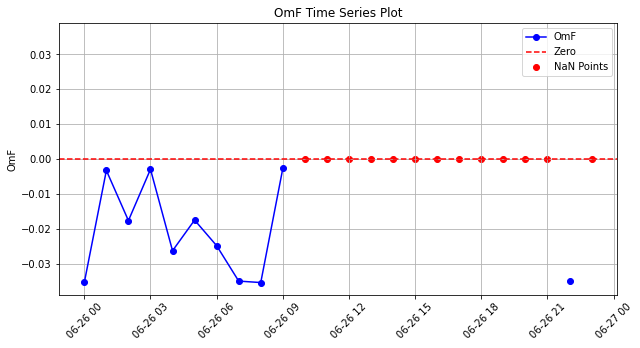

In [78]:
# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(times, hourly_omf, marker='o', linestyle='-', color='b', label='OmF')

# Plot a horizontal line at zero
plt.axhline(y=0, color='r', linestyle='--', label='Zero')

# Highlight NaN points
nan_indices = np.isnan(hourly_omf)
plt.scatter(times[nan_indices], np.zeros(sum(nan_indices)), color='red', label='NaN Points')

# Set y-axis limits to have zero line in the middle
max_val = np.nanmax(np.abs(hourly_omf)) * 1.1
plt.ylim(-max_val, max_val)

# plt.xlabel('Date')
plt.ylabel('OmF')
plt.title('OmF Time Series Plot')
plt.grid(True)
plt.legend()

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.show()